# Test CNN

In [1]:
from GMM.predict import wav2bio as gmm_wav2bio
from CNN.predict import wav2bio as cnn_wav2bio
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Audio
def linear_n_play(audio_path):
    y, sr = librosa.load(audio_path, sr=16000)
    fig, ax = plt.subplots()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()
    display(Audio(y,rate=sr))
    plt.show()
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()


/home/phucdt/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianMixture from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


cuda
Finished loading model


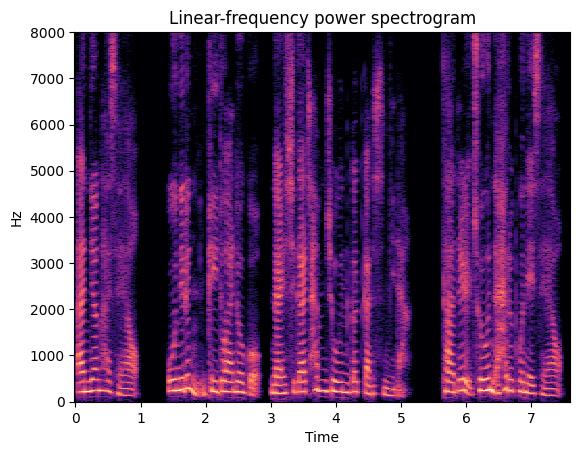

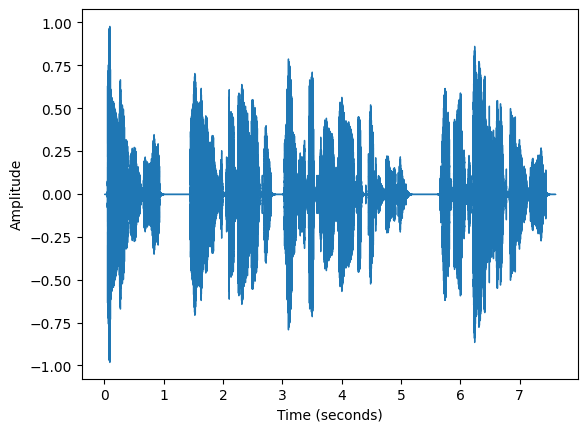

In [2]:
wav_path = "/dataa/phucdt/biosegment/data_new/wav/14.wav"
linear_n_play(wav_path)
data, sr = librosa.load(wav_path, sr=16000)

In [3]:
import time
start_time = time.time()
print(gmm_wav2bio(data, sr))
end_time = time.time()
running_time = end_time - start_time
print(f"Running time 1: {running_time:.2f} seconds")

start_time = time.time()
print(cnn_wav2bio(data, sr, class_weight=[1,5,5], scope=15))
end_time = time.time()
running_time = end_time - start_time
print(f"Running time 2: {runnin g_time:.2f} seconds")

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [14]:
179200

178800

In [2]:
def get_label_indices(labels):
    label_indices = {}
    start_index = 0
    current_label = None
    
    for i, label in enumerate(labels):
        if label != current_label:
            if current_label != None:
                if current_label in label_indices:
                    label_indices[current_label].append((start_index, i-1))
                else:
                    label_indices[current_label] = [(start_index, i-1)]
            
            current_label = label
            start_index = i
    
    if current_label != None:
        if current_label in label_indices:
            label_indices[current_label].append((start_index, len(labels)-1))
        else:
            label_indices[current_label] = [(start_index, len(labels)-1)]
    
    return label_indices

def indices_to_time(indices, sr=16000, window_size=480, hop_length=240, min_length=0.4, max_breath_length=0.7):
    label = indices[0]
    s = 0
    c = 0
    res = []
    for i in range(len(indices)):
        if indices[i] != label:
            tmp = {
                "label": label,
                "start": c,
                "end": (i-s)*(window_size-hop_length)/sr+c,
            }
            res.append(tmp)
            s=i
            c=tmp["end"]
            label = indices[i]
    
    for i in range(1,len(res)-1):
        if (res[i]['label']==0) and (res[i]["end"] - res[i]["start"] < min_length) and (res[i-1]["label"] == res[i+1]["label"]):
            res[i]["label"] = res[i-1]["label"]
        if (res[i]['label'] == 1) and (res[i]["end"] - res[i]["start"] > max_breath_length) and (res[i-1]["label"] == res[i+1]["label"]):
            res[i]["label"] = res[i-1]["label"]
    # last element
    if (res[-1]["end"] - res[-1]["start"] < min_length):
        res[-1]["label"] = res[-2]["label"]
    return res


        

In [4]:
data, sr = librosa.load('/dataa/phucdt/biosegment/data_new/wav/LA_T_8115679.wav', sr=16000)
indices_to_time(cnn_wav2bio(data, sr, class_weight=[1,1,1], scope=10), sr=sr, window_size=800, hop_length=400, min_length=0.25)

[{'label': 0, 'start': 0, 'end': 0.5},
 {'label': 2, 'start': 0.5, 'end': 0.575},
 {'label': 1, 'start': 0.575, 'end': 0.75},
 {'label': 2, 'start': 0.75, 'end': 4.4},
 {'label': 1, 'start': 4.4, 'end': 4.425000000000001}]

In [20]:
from CNN.CNN_breath import ClassifierValidator as CNNClassifierValidator
from CNN.CNN_breath import CNNClassifier, VectorDataSource
from CNN.preprocess import extract_lfcc
import os
from CNN.hparams import *
import torch
import soundfile as sf
from auditok import DataValidator, ADSFactory, DataSource, StreamTokenizer, BufferAudioSource, player_for
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cuda'
print(device)
cnn_classifier = CNNClassifier(os.path.join("./CNN/out", "cnn.pth"), device=device)
print("Finished loading model")

silence_validator = CNNClassifierValidator(cnn_classifier, "silence")
speech_validator = CNNClassifierValidator(cnn_classifier, "speech")
breath_validator = CNNClassifierValidator(cnn_classifier, "breath")
# Tokennizer
analysis_window_per_second = 1. / 0.03
print(analysis_window_per_second)
min_seg_length = 0.1 # second, min length of an accepted audio segment
max_seg_length = 0.8 # seconds, max length of an accepted audio segment
max_silence = 0.3 # second, max length tolerated of tolerated continuous signal that's not from the same class

tokenizer = StreamTokenizer(validator=silence_validator, min_length=int(min_seg_length * analysis_window_per_second),
                                    max_length=int(max_seg_length * analysis_window_per_second),
                                    max_continuous_silence= max_silence * analysis_window_per_second,
                                    mode = StreamTokenizer.DROP_TRAILING_SILENCE)
    
# Load data
# wav_path = "/root/dataset/ASVspoof/LA/ASVspoof2019_LA_train/flac/LA_T_8404615.flac"
# wav_path = "/root/dataset/ASVspoof/LA/ASVspoof2019_LA_train/flac/LA_T_2732709.flac"
# wav_path = "/root/biological/voxseg/data/wav/LA_T_2520083.wav"
# wav_path = "/dataa/Dataset/ASVspoof/LA/ASVspoof2019_LA_train/flac/LA_T_5450704.flac"
wav_path = "/dataa/Dataset/cnsl_real_fake_audio/intern_wild/204003.wav"
data, sr = sf.read(wav_path)
lfcc = VectorDataSource(data=extract_lfcc(sig=data,sr=sr),scope=15)   
lfcc.rewind()
tokens = tokenizer.tokenize(lfcc)
ts = [(t[1] * ANALYSIS_STEP, t[2] * ANALYSIS_STEP) for t in tokens]
print(ts)
# print(tokens)

cuda
Finished loading model
33.333333333333336
[(0.0, 0.375), (0.39, 0.765), (0.975, 1.3499999999999999), (1.365, 1.4549999999999998), (1.7999999999999998, 2.175), (2.19, 2.565), (2.58, 2.955), (3.48, 3.855), (3.8699999999999997, 4.245), (4.26, 4.635), (4.6499999999999995, 5.0249999999999995), (5.04, 5.415), (5.43, 5.805), (5.819999999999999, 6.194999999999999), (6.21, 6.585), (6.6, 6.975), (6.989999999999999, 7.17)]


## GMM

In [11]:
from json.tool import main
from GMM.preprocess import extract_lfcc, extract_mfcc
from GMM.GMM_breath import GMMClassifier, ClassifierValidator, VectorDataSource
import pickle
from auditok import DataValidator, ADSFactory, DataSource, StreamTokenizer, BufferAudioSource, player_for
import soundfile as sf
from IPython.display import display, Audio
from GMM.hparams import *
models = {}
for cls in ["breath", "silence", "speech"]:
    fp = open("GMM/out/{}.gmm".format(cls), "rb")
    models[cls]=pickle.load(fp)
    fp.close()

gmm_classifier = GMMClassifier(models)

silence_validator = ClassifierValidator(gmm_classifier, "silence")
speech_validator = ClassifierValidator(gmm_classifier, "speech")
breath_validator = ClassifierValidator(gmm_classifier, "breath")
# Tokennizer
analysis_window_per_second = 1. / ANALYSIS_STEP
print(analysis_window_per_second)
min_seg_length = 0.1 # second, min length of an accepted audio segment
max_seg_length = 0.8 # seconds, max length of an accepted audio segment
max_silence = 0.3 # second, max length tolerated of tolerated continuous signal that's not from the same class

tokenizer = StreamTokenizer(validator=speech_validator, min_length=int(min_seg_length * analysis_window_per_second),
                                    max_length=int(max_seg_length * analysis_window_per_second),
                                    max_continuous_silence= max_silence * analysis_window_per_second,
                                    mode = StreamTokenizer.DROP_TRAILING_SILENCE)
    
# Load data
# wav_path = "/root/dataset/ASVspoof/LA/ASVspoof2019_LA_train/flac/LA_T_8404615.flac"
# wav_path = "/root/dataset/ASVspoof/LA/ASVspoof2019_LA_train/flac/LA_T_2732709.flac"
# wav_path = "/root/biological/voxseg/data/wav/LA_T_2520083.wav"
wav_path = "/dataa/Dataset/ASVspoof/LA/ASVspoof2019_LA_train/flac/LA_T_5450704.flac"
wav_path = "/dataa/Dataset/cnsl_real_fake_audio/intern_wild/204003.wav"
data, sr = sf.read(wav_path)
lfcc = VectorDataSource(data=extract_lfcc(sig=data,sr=sr),scope=15)   
lfcc.rewind()
tokens = tokenizer.tokenize(lfcc)
ts = [(t[1] * ANALYSIS_STEP, t[2] * ANALYSIS_STEP) for t in tokens]
print(ts)
# print(tokens)

/home/phucdt/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianMixture from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


100.0
[(0.21, 1.0), (1.01, 1.8), (1.81, 2.6), (2.61, 3.4), (3.41, 4.2), (4.21, 4.78)]


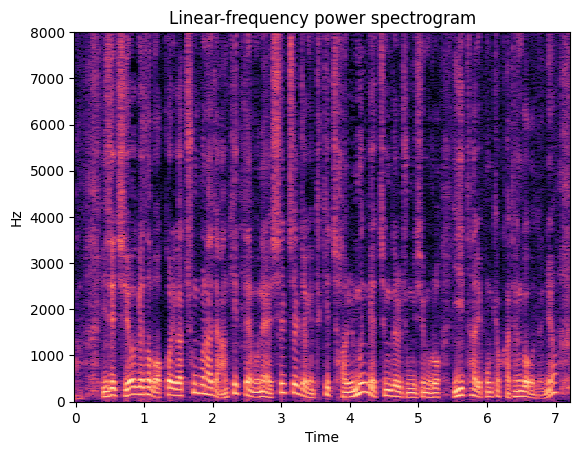

In [7]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
def linear_n_play(audio_path):
    y, sr = sf.read(audio_path)
    fig, ax = plt.subplots()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()
    display(Audio(y,rate=sr))
    plt.show()

linear_n_play(wav_path)

In [5]:
# tokenized:
biotype = {
    "silence":0,
    "breath":1,
    "speech":2
}
    
lfcc.rewind()
data = lfcc.read()
# print(data)
result = []
while (data is not None):
    
    result.append(biotype[gmm_classifier.predict(data)[0][0]])
    data = lfcc.read()

print (result)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1]


In [3]:
from predict import wav2bio
res = wav2bio(data, sr)
print(res)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1]


In [6]:
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
def ms2samples(time, rate):
    return int((time/1000)*rate)

def samples2ms(sample,rate):
    return int((sample/rate)*1000)
    
def graph_n_play(y,sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(y, sr=sr)
    plt.show()
    ipd.display(ipd.Audio(y,rate = sr))


In [7]:
for i in ts:
    start = i[0] * 1000
    stop =  i[1] * 1000
    graph_n_play(data[ms2samples(start,sr):ms2samples(stop,sr)],sr)

TypeError: 'NoneType' object is not subscriptable

In [20]:
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
mypath = "/root/dataset/ASVspoof/LA/ASVspoof2019_LA_train/flac/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
res = {}
# name = []
# timestamp = []
for file in tqdm(onlyfiles):
    data, sr = sf.read(join(mypath, file))
    lfcc = VectorDataSource(data=extract_lfcc(sig=data,sr=sr),scope=20)   
    lfcc.rewind()
    tokens = tokenizer.tokenize(lfcc)
    ts = [(t[1] * ANALYSIS_STEP, t[2] * ANALYSIS_STEP) for t in tokens]
    res[file] = ts
    # name.append(file)
    # timestamp.append(ts)
# print(res)

100%|██████████| 25380/25380 [1:15:18<00:00,  5.62it/s]


In [22]:
# import pandas as pd
# df = pd.DataFrame.from_dict({'name':name, "timestamp":timestamp})
# print(df.loc[df['name']=="LA_T_2156280.flac"])

proto_path = "/root/dataset/ASVspoof/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"
proto = {}
with open(proto_path, "r") as f:
    lines = f.readlines()
    for line in lines:
        detail = line.split(" ")
        proto["{}.flac".format(detail[1])] = detail[-1]

for key, value in res.items():
    if value:
        if proto[key].strip()=='spoof':
            print(key, value, proto[key])

LA_T_5097581.flac [(0.26, 1.05)] spoof

LA_T_2653765.flac [(0.28, 1.07), (1.08, 1.87), (1.8800000000000001, 2.5)] spoof

LA_T_6525992.flac [(0.48, 1.27), (1.28, 2.07), (2.08, 2.44)] spoof

LA_T_5770209.flac [(0.22, 0.9)] spoof

LA_T_2156280.flac [(0.42, 1.21), (1.22, 1.55)] spoof

LA_T_4578357.flac [(0.37, 1.16), (1.17, 1.33)] spoof

LA_T_6436778.flac [(0.51, 1.3), (1.31, 1.72)] spoof

LA_T_7726906.flac [(0.33, 0.91)] spoof

LA_T_3494227.flac [(0.7000000000000001, 1.49), (1.5, 1.59)] spoof

LA_T_5146354.flac [(0.48, 1.09)] spoof

LA_T_1691064.flac [(0.23, 1.02), (1.03, 1.16)] spoof

LA_T_3460794.flac [(0.65, 1.44), (1.45, 2.24), (2.25, 2.63)] spoof

LA_T_1561697.flac [(0.45, 1.24), (1.25, 1.29)] spoof

LA_T_2550626.flac [(0.42, 1.21), (1.22, 2.0100000000000002), (2.02, 2.33)] spoof

LA_T_1698884.flac [(0.42, 1.21), (1.22, 2.0100000000000002), (2.02, 2.06)] spoof

LA_T_4835140.flac [(0.28, 1.07), (1.08, 1.81)] spoof

LA_T_5379096.flac [(0.47000000000000003, 1.26), (1.27, 2.06), (2.07, 2

In [34]:
import torch
model = torch.load('/root/biological/asvspoof2021/LA/Baseline-RawNet2-bio/models/trans_concat64/epoch_87.pth')
# w = torch.load('/root/biological/')
# print(model['bioScoring.bio_embedding.weight'])
print(model)

OrderedDict([('first_bn.weight', tensor([0.9864, 1.0388, 1.0123, 0.9627, 0.9506, 0.9912, 0.9887, 0.9681, 0.9250,
        0.9799, 1.0343, 0.9596, 0.9270, 0.9566, 0.9416, 0.9278, 0.9100, 0.9147,
        0.9051, 0.9533], device='cuda:0')), ('first_bn.bias', tensor([ 0.0428, -0.0200, -0.0231,  0.0204, -0.0126,  0.0006,  0.0118,  0.0177,
         0.0309,  0.0722, -0.0554, -0.0117, -0.0029, -0.0192,  0.0248,  0.0688,
        -0.0377, -0.0353,  0.0158, -0.0493], device='cuda:0')), ('first_bn.running_mean', tensor([0.0028, 0.0239, 0.0278, 0.0233, 0.0248, 0.0150, 0.0073, 0.0080, 0.0070,
        0.0065, 0.0054, 0.0048, 0.0048, 0.0051, 0.0040, 0.0030, 0.0021, 0.0018,
        0.0018, 0.0012], device='cuda:0')), ('first_bn.running_var', tensor([8.5248e-05, 2.1518e-03, 3.0208e-03, 2.1632e-03, 3.0740e-03, 1.6642e-03,
        4.9172e-04, 5.7062e-04, 4.1846e-04, 3.0049e-04, 1.9760e-04, 1.5148e-04,
        1.2749e-04, 1.5495e-04, 1.0968e-04, 5.8676e-05, 5.2104e-05, 5.1315e-05,
        5.2755e-05, 2.4541

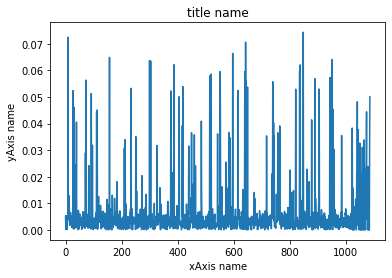

In [31]:
import matplotlib.pyplot as plt
datay = torch.abs(model['fc2_gru.weight'])[1].cpu().detach().numpy()

# datax = range(1024+64)
plt.plot(datay)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()